# 分析星巴克的客人問卷調查

In [1]:
# 讀取星巴克的CSV檔
import pandas as pd
df = pd.read_csv("Starbucks satisfactory survey.csv")
df

,調查時間,性別,年齡,職業,年收入,拜訪頻率,享用方式,停留時間,家裡到星巴克的距離,會員卡,...,花費金額,產品評價,價格平價,活動評價,氣氛評價,店內Wifi 評價,服務評價,會選擇星巴克當工作或朋友聚會的地方嗎?,促銷管道,還會購買嗎?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,學生,"Less than RM25,000",很少,內用,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,會
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,學生,"Less than RM25,000",很少,外帶,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,會
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,就業人員,"Less than RM25,000",每個月,內用,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,會
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,學生,"Less than RM25,000",很少,外帶,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,不會
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,學生,"Less than RM25,000",每個月,外帶,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,會
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,Male,40 and above,自僱人士,"RM25,000 - RM50,000",每個月,內用,Between 1 hour to 2 hours,1km - 3km,Yes,...,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,會
118,2019/10/04 9:30:09 AM GMT+8,Male,From 20 to 29,就業人員,"Less than RM25,000",每個月,內用,Between 1 hour to 2 hours,1km - 3km,Yes,...,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,會
119,2019/10/04 1:46:07 PM GMT+8,Male,From 20 to 29,學生,"Less than RM25,000",很少,內用,Between 30 minutes to 1 hour,1km - 3km,No,...,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,不會
120,2019/10/05 11:01:14 AM GMT+8,Female,From 20 to 29,就業人員,"Less than RM25,000",很少,外帶,Below 30 minutes,within 1km,No,...,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,會


In [2]:
# 檢查資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   調查時間                 122 non-null    object
 1   性別                   122 non-null    object
 2   年齡                   122 non-null    object
 3   職業                   122 non-null    object
 4   年收入                  122 non-null    object
 5   拜訪頻率                 122 non-null    object
 6   享用方式                 122 non-null    object
 7    停留時間                122 non-null    object
 8   家裡到星巴克的距離            122 non-null    object
 9   會員卡                  122 non-null    object
 10   購買項目                122 non-null    object
 11  花費金額                 122 non-null    object
 12  產品評價                 122 non-null    int64 
 13  價格平價                 122 non-null    int64 
 14  活動評價                 122 non-null    int64 
 15  氣氛評價                 122 non-null    int64 
 16  店內Wifi 評

In [3]:
# 選擇職業
df["職業"]

0        學生
1        學生
2      就業人員
3        學生
4        學生
       ... 
117    自僱人士
118    就業人員
119      學生
120    就業人員
121    就業人員
Name: 職業, Length: 122, dtype: object

# 對每一個職業做分析

In [4]:
# 做職業的分析
wk_group= df.groupby(["職業"])
wk_group

In [5]:
# 分析每一個職業的享用方式比例
enjoy = wk_group["享用方式"].value_counts()
enjoy

職業    享用方式
學生    內用      17
      外帶      14
      得來速      7
      不會去      4
家庭主婦  外帶       1
      得來速      1
就業人員  外帶      28
      內用      22
      得來速      9
      不會去      2
自僱人士  內用       7
      外帶       6
      得來速      3
      不會去      1
Name: 享用方式, dtype: int64

In [6]:
# 分析每個職業有無會員卡
card = wk_group["會員卡"].value_counts() 
card

職業    會員卡
學生    No     30
      Yes    12
家庭主婦  No      1
      Yes     1
就業人員  Yes    37
      No     24
自僱人士  Yes    10
      No      7
Name: 會員卡, dtype: int64

In [8]:
# 分析每個職業還會購買嗎?
buy = wk_group["還會購買嗎?"].value_counts()
buy

職業    還會購買嗎?
學生    會         28
      不會        14
家庭主婦  會          2
就業人員  會         49
      不會        12
自僱人士  會         15
      不會         2
Name: 還會購買嗎?, dtype: int64

# 篩選出有會員還會購買的人數

In [9]:
# 學生
sd = (df["職業"] == "學生") & (df["會員卡"]=="Yes") & (df["還會購買嗎?"] == "會")
print("學生 = " +str(len(df.loc[sd,["職業","會員卡","還會購買嗎?"]])))

# 就業人員
ed = (df["職業"] == "就業人員") & (df["會員卡"]=="Yes") & (df["還會購買嗎?"] == "會")
print("就業人員 = " +str(len(df.loc[ed,["職業","會員卡","還會購買嗎?"]])))

# 自僱人士
sed = (df["職業"] == "自僱人士") & (df["會員卡"]=="Yes") & (df["還會購買嗎?"] == "會")
print("自僱人士 = " +str(len(df.loc[sed,["職業","會員卡","還會購買嗎?"]])))

# 家庭主婦
hw = (df["職業"] == "家庭主婦") & (df["會員卡"]=="Yes") & (df["還會購買嗎?"] == "會")
print("家庭主婦 = "+ str(len(df.loc[hw,["職業","會員卡","還會購買嗎?"]])))

學生 = 11
就業人員 = 33
自僱人士 = 10
家庭主婦 = 1


# 篩選出沒有會員還會購買的人數

In [10]:
# 學生
sd = (df["職業"] == "學生") & (df["會員卡"]=="No") & (df["還會購買嗎?"] == "會")
print("學生 = " +str(len(df.loc[sd,["職業","會員卡","還會購買嗎?"]])))

# 就業人員
ed = (df["職業"] == "就業人員") & (df["會員卡"]=="No") & (df["還會購買嗎?"] == "會")
print("就業人員 = " +str(len(df.loc[ed,["職業","會員卡","還會購買嗎?"]])))

# 自僱人士
sed = (df["職業"] == "自僱人士") & (df["會員卡"]=="No") & (df["還會購買嗎?"] == "會")
print("自僱人士 = " +str(len(df.loc[sed,["職業","會員卡","還會購買嗎?"]])))

# 家庭主婦
hw = (df["職業"] == "家庭主婦") & (df["會員卡"]=="No") & (df["還會購買嗎?"] == "會")
print("家庭主婦 = "+ str(len(df.loc[hw,["職業","會員卡","還會購買嗎?"]])))

學生 = 17
就業人員 = 16
自僱人士 = 5
家庭主婦 = 1


# 畫出享用方式的比例圖表

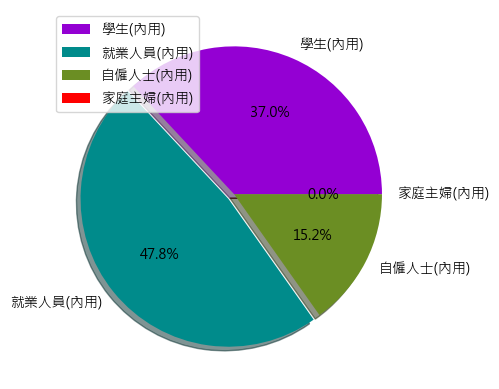

In [11]:
# 內用哪一個比較客群比較多
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
labels = ["學生(內用)" , "就業人員(內用)" , "自僱人士(內用)" , "家庭主婦(內用)"]
colors = ["darkviolet" , "darkcyan" , "olivedrab" , "red"]
sizes = [(17 / 100) , (22 / 100) , (7 / 100) , (0 / 100)]
explode = (0 , 0.05 , 0, 0)
plt.pie(sizes, labels = labels, colors = colors, explode = explode , autopct = "%1.1f%%", shadow=True)
plt.legend(loc =  "upper left")
plt.show()

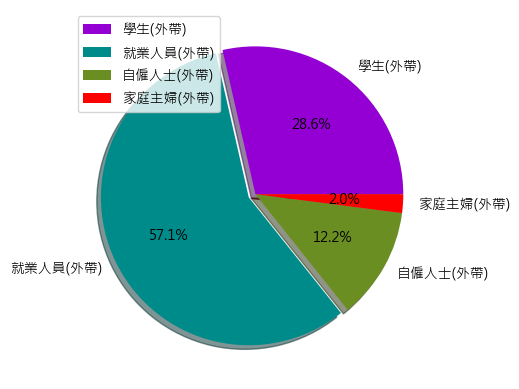

In [12]:
#外帶的人數哪個比較多
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
labels = ["學生(外帶)" , "就業人員(外帶)" , "自僱人士(外帶)" , "家庭主婦(外帶)"]
colors = ["darkviolet" , "darkcyan" , "olivedrab" , "red"]
sizes = [(14 / 100) , (28 / 100) , (6 / 100) , (1 / 100)]
explode = (0 , 0.05 , 0, 0)
plt.pie(sizes, labels = labels, colors = colors, explode = explode , autopct = "%1.1f%%", shadow=True)
plt.legend(loc =  "upper left")
plt.show()

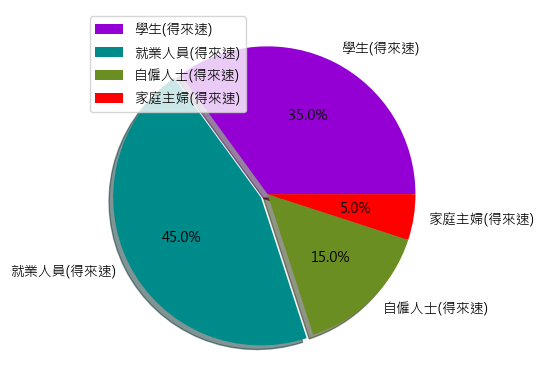

In [13]:
# 得來速的人數哪個比較多
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
labels = ["學生(得來速)" , "就業人員(得來速)" , "自僱人士(得來速)" , "家庭主婦(得來速)"]
colors = ["darkviolet" , "darkcyan" , "olivedrab" , "red"]
sizes = [(7 / 100) , (9 / 100) , (3 / 100) , (1 / 100)]
explode = (0 , 0.05 , 0, 0)
plt.pie(sizes, labels = labels, colors = colors, explode = explode , autopct = "%1.1f%%", shadow=True)
plt.legend(loc =  "upper left")
plt.show()

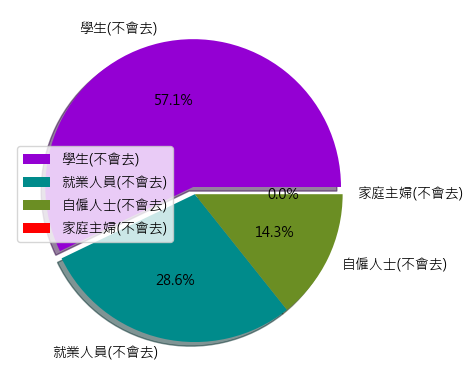

In [14]:
# 不會去星巴克的人數哪個比較多
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
labels = ["學生(不會去)" , "就業人員(不會去)" , "自僱人士(不會去)" , "家庭主婦(不會去)"]
colors = ["darkviolet" , "darkcyan" , "olivedrab" , "red"]
sizes = [(4 / 100) , (2 / 100) , (1 / 100) , (0 / 100)]
explode = (0.05 , 0 , 0, 0)
plt.pie(sizes, labels = labels, colors = colors, explode = explode , autopct = "%1.1f%%", shadow=True)
plt.legend(loc =  "center left")
plt.show()

# 畫出篩選有會員還會購買的圖表

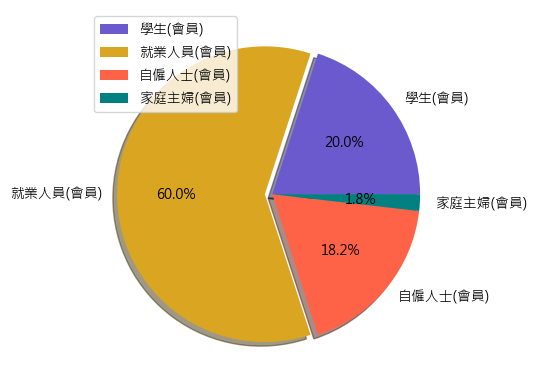

In [15]:
# 各個職業的有會員去星巴克的人
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
labels = ["學生(會員)" , "就業人員(會員)" , "自僱人士(會員)" , "家庭主婦(會員)"]
colors = ["slateblue" , "goldenrod" , "tomato" , "teal"]
sizes = [(11 / 100) , (33 / 100) , (10 / 100) , (1 / 100)]
explode = (0 , 0.05 , 0, 0)
plt.pie(sizes, labels = labels, colors = colors, explode = explode , autopct = "%1.1f%%", shadow=True)
plt.legend(loc =  "upper left")
plt.show()

# 畫出篩選沒有會員還會購買的圖表

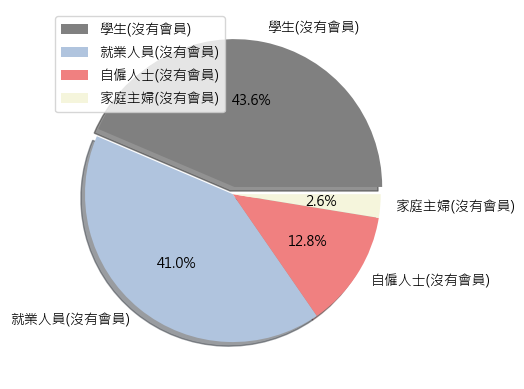

In [16]:
# 沒有會員還會再來買的人數
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
labels = [ "學生(沒有會員)" , "就業人員(沒有會員)" , "自僱人士(沒有會員)","家庭主婦(沒有會員)"]
colors = ["gray","lightsteelblue","lightcoral","beige"]
sizes = [(17/100),(16/100),(5/100),(1/100)]
explode = (0.05 , 0 , 0 , 0 ,)
plt.pie(sizes, labels = labels, colors = colors, explode = explode , autopct = "%1.1f%%", shadow=True)
plt.legend(loc =  "upper left")
plt.show()

# 把享用方式的人數、篩選後的資料印回去Excel

In [17]:
# 享用方式的比例寫回去 excel 的筆記
import pandas as pd
import xlwings as xw

wk_group = df.groupby(["職業"])
work = wk_group["享用方式"].value_counts()

wb = xw.Book(r"Starbucks 統計.xlsx")
data_sheet = wb.sheets["星巴克數據"]
stat_sheet = wb.sheets["統計"]
stat_sheet.range("A1").value = [
    ["職業", "享用方式" , "人數"]
]
stat_sheet.range("A1:C1").color = (128,128,255)
lst = []
for index, count in work.iteritems():
    occupation = index[0]
    method = index[1]
    lst.append([occupation, method, count])

stat_sheet.range("A2").value = lst

In [18]:
# 有會員還會回來購買的比例寫回去 excel 
import pandas as pd
import xlwings as xw

wb = xw.Book(r"Starbucks 統計.xlsx")
data_sheet = wb.sheets["星巴克數據"]
stat_sheet = wb.sheets["統計"]
stat_sheet.range("E1").value = [
    ["職業(有會員)", "人數", ""]
]
stat_sheet.range("E1:F1").color = (128,128,255)
dic = {}
sd = (df["職業"] == "學生") & (df["會員卡"]=="Yes") & (df["還會購買嗎?"] == "會")
dic["學生還會購買"] = len(df.loc[sd,["職業","會員卡","還會購買嗎?"]])
ed = (df["職業"] == "就業人員") & (df["會員卡"]=="Yes") & (df["還會購買嗎?"] == "會")
dic["就業人員還會購買"] = len(df.loc[ed,["職業","會員卡","還會購買嗎?"]])
sed = (df["職業"] == "自僱人士") & (df["會員卡"]=="Yes") & (df["還會購買嗎?"] == "會")
dic["自僱人士還會購買"] = len(df.loc[sed,["職業","會員卡","還會購買嗎?"]])
hw = (df["職業"] == "家庭主婦") & (df["會員卡"]=="Yes") & (df["還會購買嗎?"] == "會")
dic["家庭主婦還會購買"] = len(df.loc[hw,["職業","會員卡","還會購買嗎?"]])

stat_sheet.range("E2").value = dic

In [19]:
# 沒有會員還會回來購買的比例寫回去 excel 
import pandas as pd
import xlwings as xw

wb = xw.Book(r"Starbucks 統計.xlsx")
data_sheet = wb.sheets["星巴克數據"]
stat_sheet = wb.sheets["統計"]
stat_sheet.range("E11").value = [
    ["職業(沒有會員)", "人數", ""]
]
stat_sheet.range("E11:F11").color = (128,128,255)
dic = {}
sd = (df["職業"] == "學生") & (df["會員卡"]=="No") & (df["還會購買嗎?"] == "會")
dic["學生還會購買"] = len(df.loc[sd,["職業","會員卡","還會購買嗎?"]])
ed = (df["職業"] == "就業人員") & (df["會員卡"]=="No") & (df["還會購買嗎?"] == "會")
dic["就業人員還會購買"] = len(df.loc[ed,["職業","會員卡","還會購買嗎?"]])
sed = (df["職業"] == "自僱人士") & (df["會員卡"]=="No") & (df["還會購買嗎?"] == "會")
dic["自僱人士還會購買"] = len(df.loc[sed,["職業","會員卡","還會購買嗎?"]])
hw = (df["職業"] == "家庭主婦") & (df["會員卡"]=="No") & (df["還會購買嗎?"] == "會")
dic["家庭主婦還會購買"] = len(df.loc[hw,["職業","會員卡","還會購買嗎?"]])

stat_sheet.range("E12").value = dic
stat_sheet.range("A:H").autofit()